In [1]:
import yfinance as yf

df = yf.download('BTC-USD', start='2022-01-01')

/home/repos/venv/trickycases/lib/python3.7/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


[*********************100%***********************]  1 of 1 completed


In [2]:
import pandas as pd

from pandas import DataFrame

def get_bollinger_bands(df:DataFrame, column:str, period:int, std_dev:float) -> pd.DataFrame:
    """
    Calculates the Bollinger Bands for a given column in a dataframe.
    :param df: The dataframe containing the column.
    :param column: The column to be used.
    :param period: The period to be used.
    :return: The dataframe with the Bollinger Bands columns.
    """

    f'{column}_upper_band' == '{}_upper_band'.format(column)
    
    df['{}_upper_band'.format(column)] = df[column].rolling(period).mean() + (df[column].rolling(period).std() * std_dev)
    df['{}_lower_band'.format(column)] = df[column].rolling(period).mean() - (df[column].rolling(period).std() * std_dev)
    return df

In [3]:
def get_macd(df, column, period1, period2, period3):
    """
    Calculates the MACD for a given column in a dataframe.
    :param df: The dataframe containing the column.
    :param column: The column to be used.
    :param period1: The first period to be used.
    :param period2: The second period to be used.
    :param period3: The third period to be used.
    """

    df['{}_macd'.format(column)] = df[column].ewm(span=period1).mean() - df[column].ewm(span=period2).mean()
    df['{}_signal'.format(column)] = df['{}_macd'.format(column)].ewm(span=period3).mean()
    return df

In [4]:
def plot_bollinger_bands(df, column, period, std_dev):
    """
    Plots the Bollinger Bands for a given column in a dataframe.
    """
    df = get_bollinger_bands(df, column, period, std_dev)

    ax = df[f'{column}_lower_band'].plot(color='blue', label='Lower Band')
    df[f'{column}_upper_band'].plot(color='red', label='Upper Band', ax=ax)

    return ax

def plot_macd(df, column, period1, period2, period3):
    """
    Plots the MACD for a given column in a dataframe.
    """
    df = get_macd(df, column, period1, period2, period3)

    ax = df[f'{column}_macd'].plot(color='blue', label='MACD')
    df[f'{column}_signal'].plot(color='red', label='Signal', ax=ax)
    
    return ax

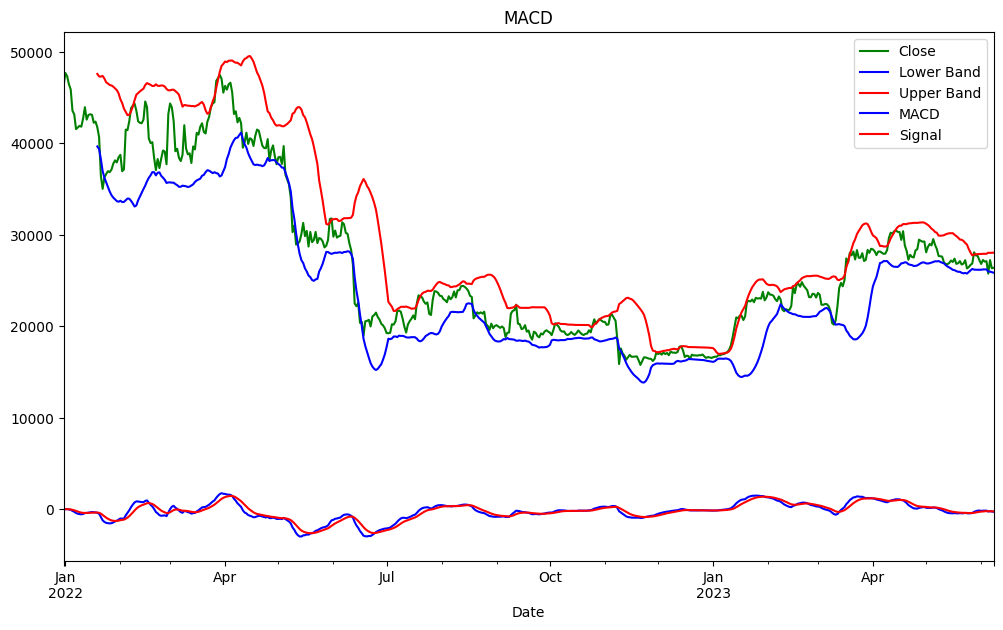

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 7), dpi=100, facecolor='w', edgecolor='k', frameon=True)

ax1 = df['Close'].plot(color='green', label='Close')
ax2 = plot_bollinger_bands(df, 'Close', 20, 2)
ax3 = plot_macd(df, 'Close', 12, 26, 9)

ax1.set_title('BTC-USD')
ax2.set_title('Bollinger Bands')
ax3.set_title('MACD')
plt.legend(loc='best')